# Assignment No.10
Student Name:Sayali Satyaprem Lagad. \
Subject: SL-III \
Batch: B \
Roll No.:2337021 

# 10) Data Visualization III 
Download the Iris flower dataset or any other dataset into a DataFrame. (e.g., 
https://archive.ics.uci.edu/ml/datasets/Iris ). Scan the dataset and give the inference as: 
1. List down the features and their types (e.g., numeric, nominal) available in the dataset. 
2. Create a histogram for each feature in the dataset to illustrate the feature distributions. 
3. Create a boxplot for each feature in the dataset. 
4. Compare distributions and identify outliers. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset("iris")

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.shape

(150, 5)

### List down the features and their types (e.g., numeric, nominal) available in the dataset.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

### Create a histogram for each feature in the dataset to illustrate the feature distributions.

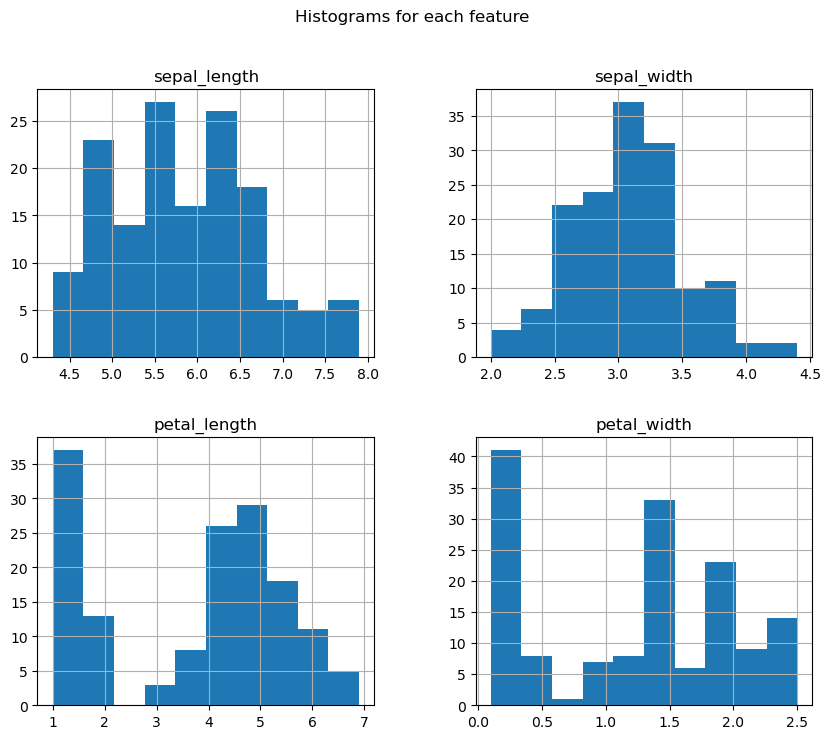

In [21]:
df.hist(figsize=(10, 8))
plt.suptitle("Histograms for each feature")
plt.show()

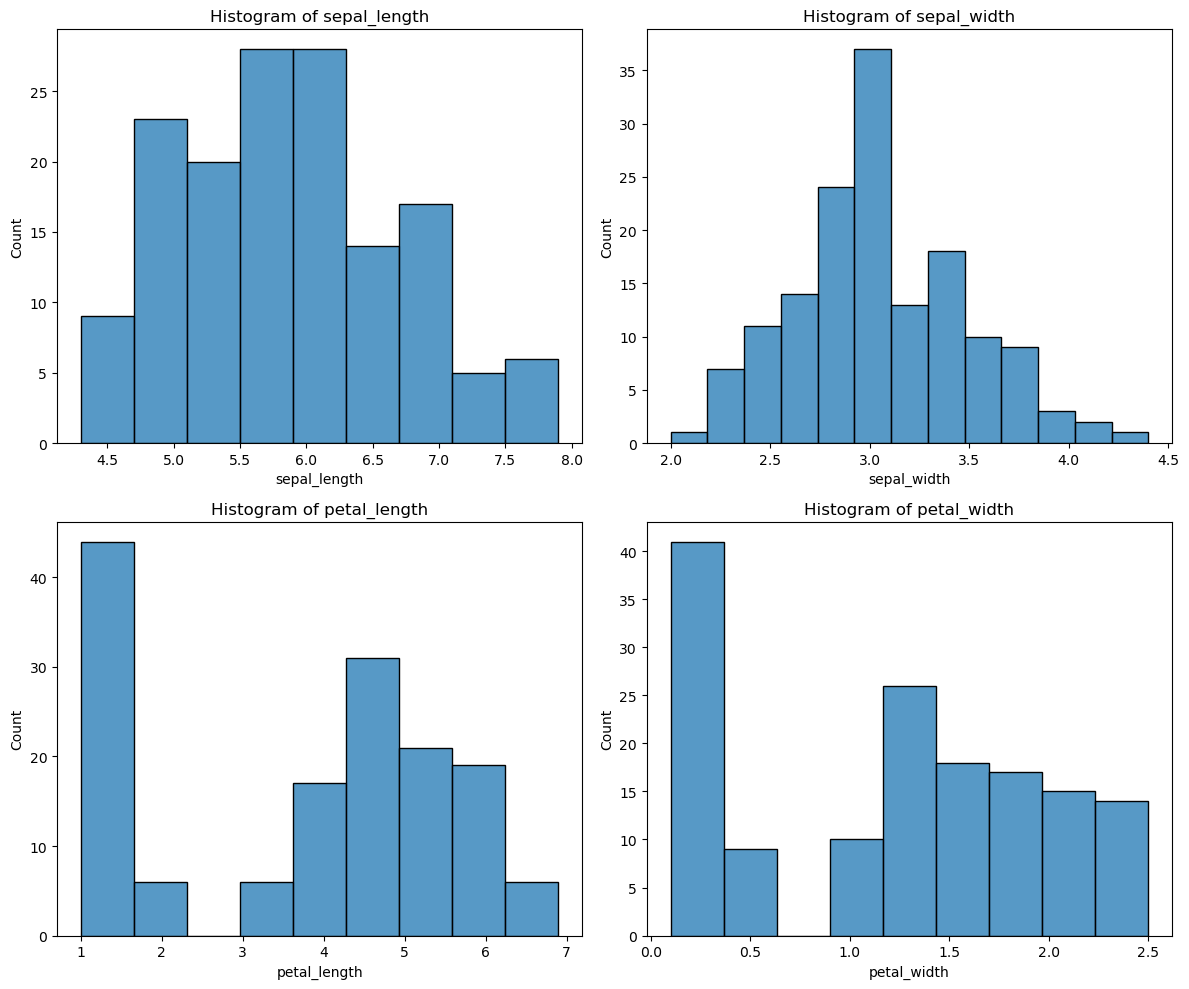

In [20]:
plt.figure(figsize=(12, 10))
for i, feature in enumerate(df.columns[:-1]):  # Exclude the 'class' column
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=df, x=feature, kde=False)
    plt.title(f"Histogram of {feature}")

plt.tight_layout()
plt.show()

### Create a boxplot for each feature in the dataset.

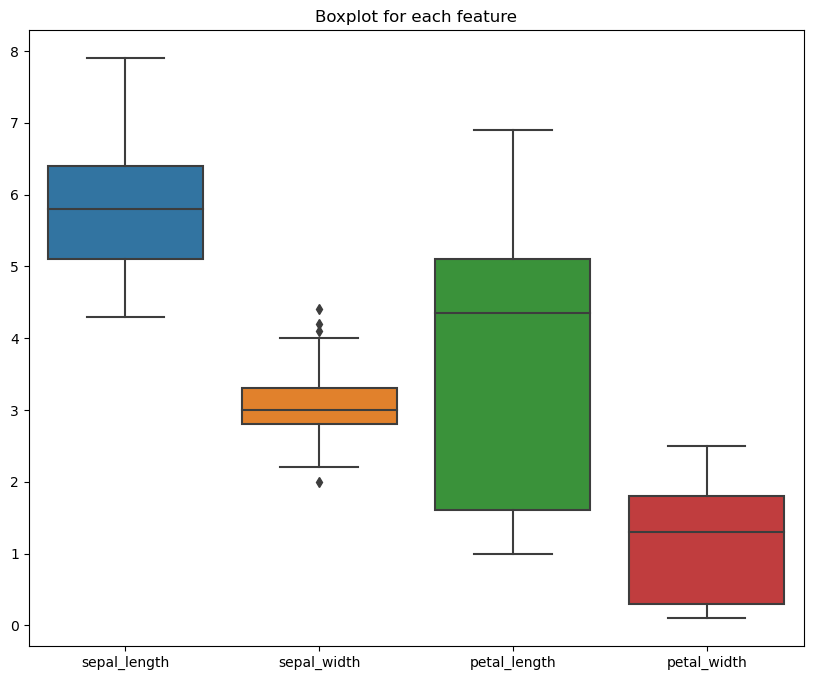

In [14]:
# Create boxplots for each feature
plt.figure(figsize=(10, 8))
sns.boxplot(data=df)
plt.title("Boxplot for each feature")
plt.show()

<AxesSubplot:xlabel='species', ylabel='sepal_width'>

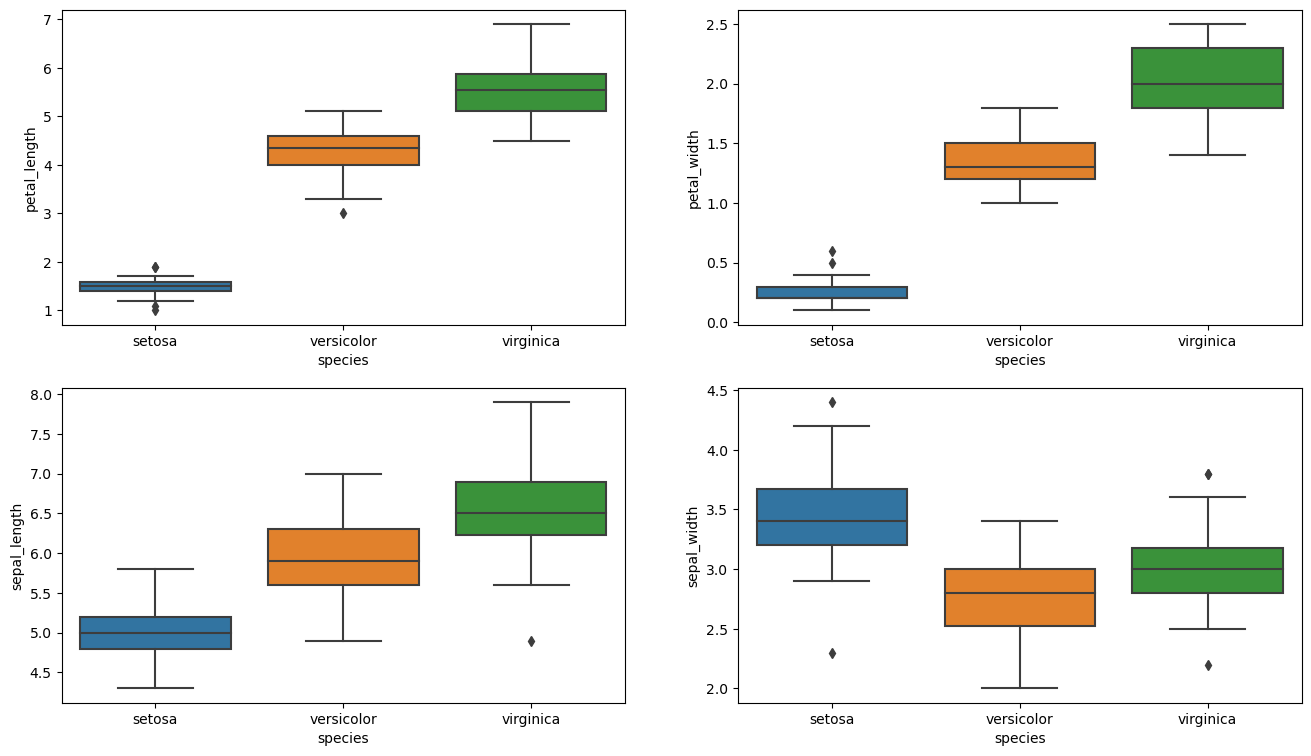

In [22]:
fig,axes = plt.subplots(2,2,figsize=(16,9))
sns.boxplot(y='petal_length',x='species',data = df,ax = axes[0,0])
sns.boxplot(y='petal_width',x='species',data = df,ax = axes[0,1])
sns.boxplot(y='sepal_length',x='species',data = df,ax = axes[1,0])
sns.boxplot(y='sepal_width',x='species',data = df,ax = axes[1,1])

### Compare distributions and identify outliers.

In [27]:
outliers = {}
for column in df.columns[:-1]:  # Exclude the 'class' column
    Q1 = np.percentile(df[column], 25)
    Q3 = np.percentile(df[column], 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outlier_indices = df[(df[column] < lower_bound) | (df[column] > upper_bound)].index
    outliers[column] = outlier_indices

print("\nOutliers:")
for feature, indices in outliers.items():
    print(f"{feature}: {indices}")


Outliers:
sepal_length: Int64Index([], dtype='int64')
sepal_width: Int64Index([15, 32, 33, 60], dtype='int64')
petal_length: Int64Index([], dtype='int64')
petal_width: Int64Index([], dtype='int64')


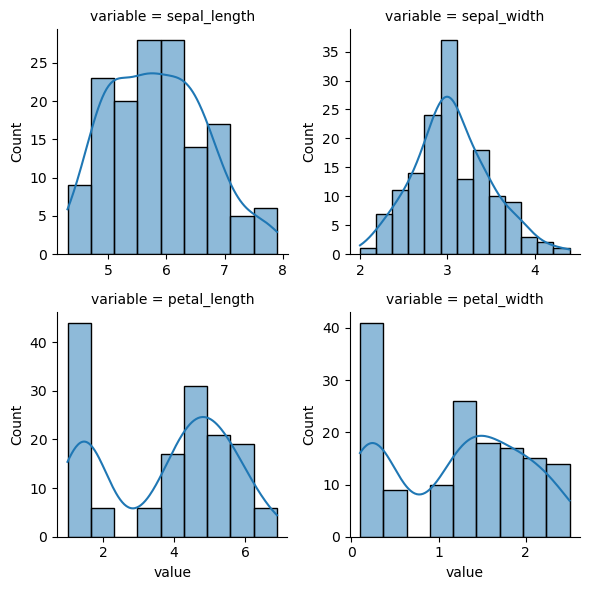

In [29]:
g = sns.FacetGrid(df.melt(id_vars='species'), col='variable', col_wrap=2, sharex=False, sharey=False)
g.map(sns.histplot, 'value', kde=True)